<a href="https://colab.research.google.com/github/naashonomics/2022_prep/blob/main/vmware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pytest

49. Group Anagrams

Given an array of strings strs, group the anagrams together. You can return the answer in any order.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

 

Example 1:

Input: strs = ["eat","tea","tan","ate","nat","bat"]
Output: [["bat"],["nat","tan"],["ate","eat","tea"]]
Example 2:

Input: strs = [""]
Output: [[""]]
Example 3:

Input: strs = ["a"]
Output: [["a"]]
 

Constraints:

1 <= strs.length <= 104
0 <= strs[i].length <= 100
strs[i] consists of lowercase English letters.

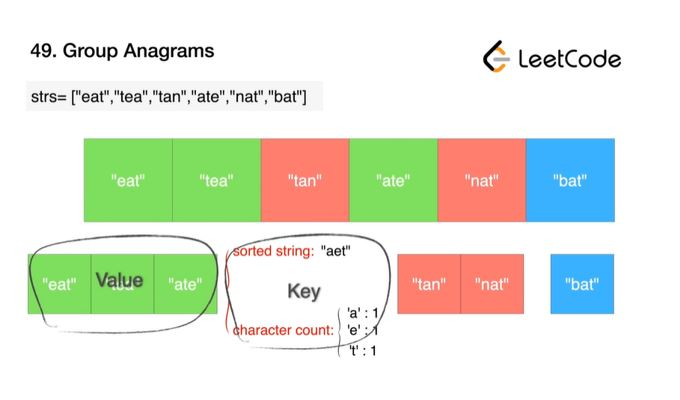
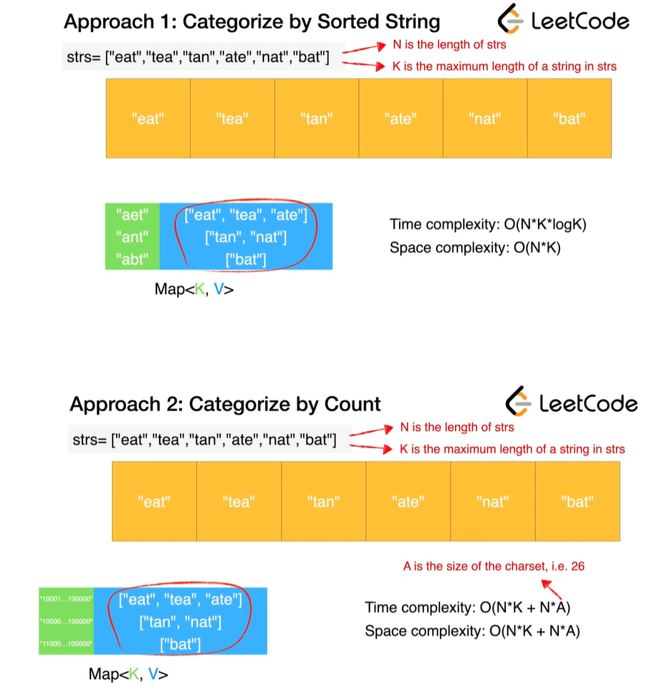

#Hash Table #string #Sorting

In [13]:
from collections import defaultdict
class Solution(object):
    def groupAnagrams(self, strs):
        """
        :type strs: List[str]
        :rtype: List[List[str]]
        """
        ans=defaultdict(list)
        for s in strs:
            ans[tuple(sorted(s))].append(s)
        return ans.values()
        # TC O (N*K *LogK)
        # SC O (N*K)

class Solution1:
    def groupAnagrams(self,strs):
        ans = defaultdict(list)
        for s in strs:
            count = [0] * 26
            for c in s:
                count[ord(c) - ord('a')] += 1
            ans[tuple(count)].append(s)
        return ans.values()
        # TC O (N*K)
        # SC O (N*K)

s = Solution()
s1 = Solution1()
print(s1.groupAnagrams(["eat","tea","tan","ate","nat","bat"]))
def test_1():
  input1=["eat","tea","tan","ate","nat","bat"]
  assert set_equals(
    s.groupAnagrams(input1),
        [
          ["bat"],["eat","tea","ate"],["tan","nat"]
        ])
print(s.groupAnagrams(["eat","tea","tan","ate","nat","bat"]))


dict_values([['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']])
dict_values([['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']])


121. Best Time to Buy and Sell Stock 

You are given an array prices where prices[i] is the price of a given stock on the ith day.

You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.

 

Example 1:

Input: prices = [7,1,5,3,6,4]
Output: 5
Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), profit = 6-1 = 5.
Note that buying on day 2 and selling on day 1 is not allowed because you must buy before you sell.
Example 2:

Input: prices = [7,6,4,3,1]
Output: 0
Explanation: In this case, no transactions are done and the max profit = 0.
 

Constraints:

1 <= prices.length <= 105
0 <= prices[i] <= 104

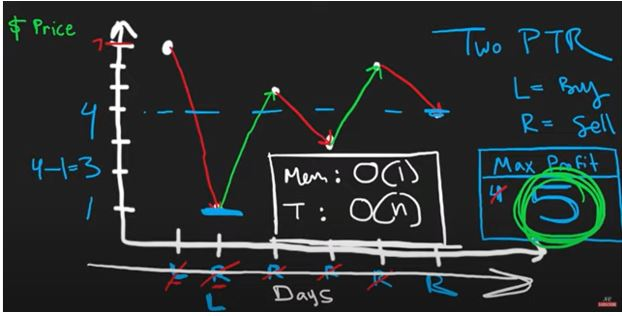

In [17]:
class Solution:
    def maxProfit(self, prices):
        l,r=0,1  # left =buy , right = sell
        maxP=0
        while r < len(prices):
            #profitable 
            if prices[l] < prices[r] :
                profit = prices[r] - prices[l]
                maxP=max(maxP,profit)
            else:
                l = r
            r += 1
        return maxP

s=Solution()
prices = [7,1,5,3,6,4]
print(s.maxProfit(prices)) #5 
prices = [7,6,4,3,1]
print(s.maxProfit(prices)) #0 

5
0


226. Invert Binary Tree 

Given the root of a binary tree, invert the tree, and return its root.

 

Example 1:
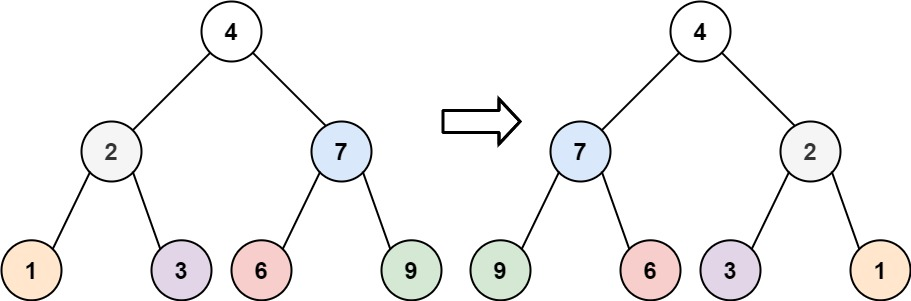

Input: root = [4,2,7,1,3,6,9]
Output: [4,7,2,9,6,3,1]
Example 2:
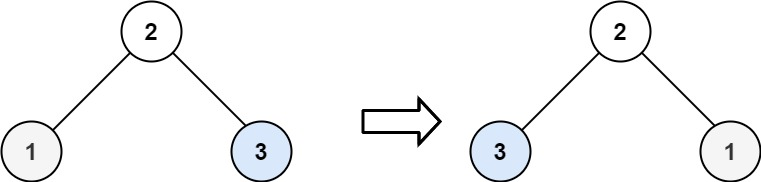

Input: root = [2,1,3]
Output: [2,3,1]
Example 3:

Input: root = []
Output: [] 

In [3]:

class Solution:
    def invertTree(self, root):
        if root is None:
            return None
        root.left , root.right = self.invertTree(root.right),self.invertTree(root.left)
        
        return root 
 

1046. Last Stone Weight 

You are given an array of integers stones where stones[i] is the weight of the ith stone.

We are playing a game with the stones. On each turn, we choose the heaviest two stones and smash them together. Suppose the heaviest two stones have weights x and y with x <= y. The result of this smash is:

If x == y, both stones are destroyed, and
If x != y, the stone of weight x is destroyed, and the stone of weight y has new weight y - x.
At the end of the game, there is at most one stone left.

Return the smallest possible weight of the left stone. If there are no stones left, return 0.

 

Example 1:

Input: stones = [2,7,4,1,8,1]
Output: 1
Explanation: 
We combine 7 and 8 to get 1 so the array converts to [2,4,1,1,1] then,
we combine 2 and 4 to get 2 so the array converts to [2,1,1,1] then,
we combine 2 and 1 to get 1 so the array converts to [1,1,1] then,
we combine 1 and 1 to get 0 so the array converts to [1] then that's the value of the last stone.
Example 2:

Input: stones = [1]
Output: 1

Constraints:

1 <= stones.length <= 30
1 <= stones[i] <= 1000

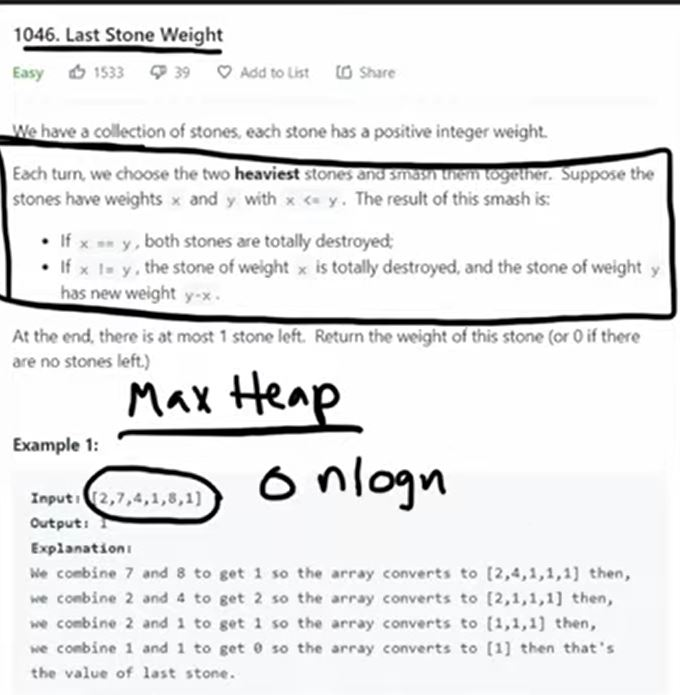

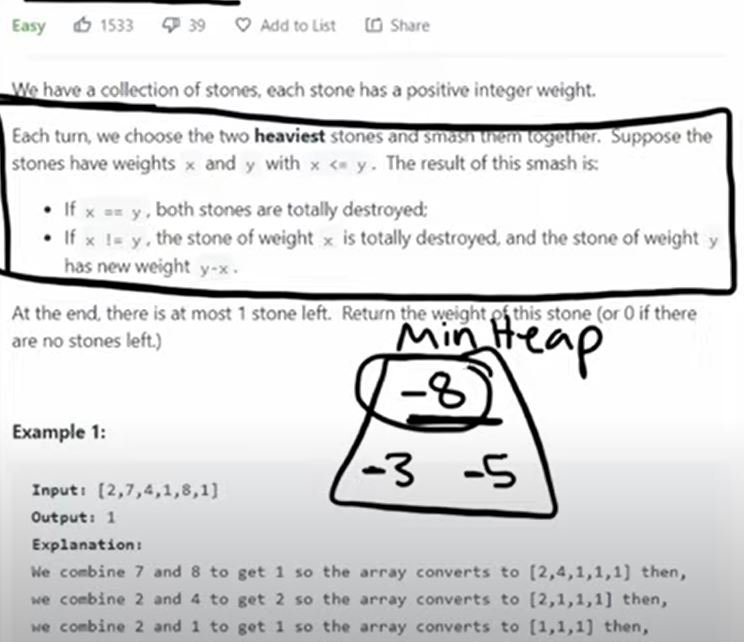

In [ ]:
class Solution:
    def lastStoneWeight(self, stones: List[int]) -> int:
        stones = [-s for s in stones]    
        heapq.heapify(stones)
        
        while len(stones) > 1:
            first=heapq.heappop(stones)
            second=heapq.heappop(stones)
            if second > first :
                heapq.heappush(stones,first-second)
        
        
        if len(stones)==0:
            stones.append(0)
        return abs(stones[0])
#TC nlogn

252. Meeting Rooms

Given an array of meeting time intervals where intervals[i] = [starti, endi],

 determine if a person could attend all meetings.

 

Example 1:

Input: intervals = [[0,30],[5,10],[15,20]]

Output: false


Example 2:

Input: intervals = [[7,10],[2,4]]

Output: true
 

Constraints:

0 <= intervals.length <= 104

intervals[i].length == 2

0 <= starti < endi <= 106

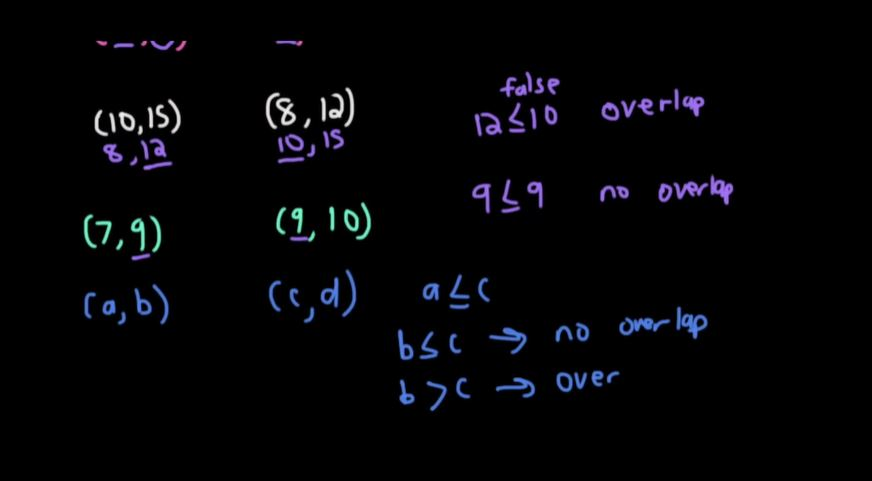

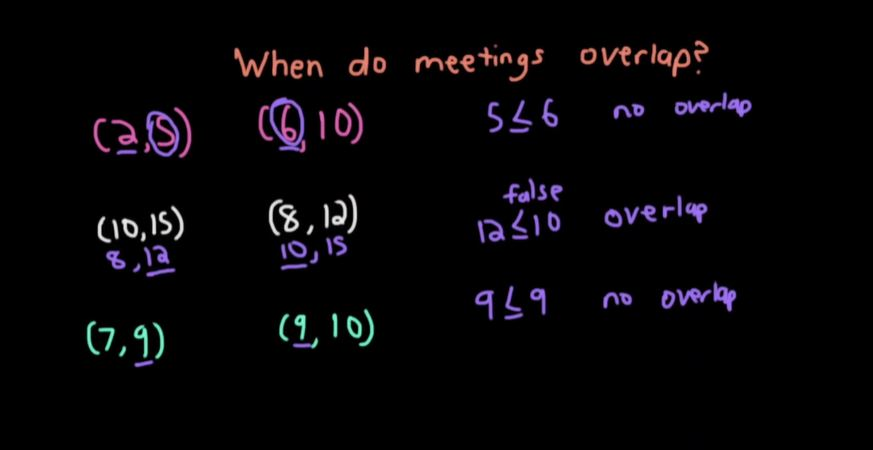

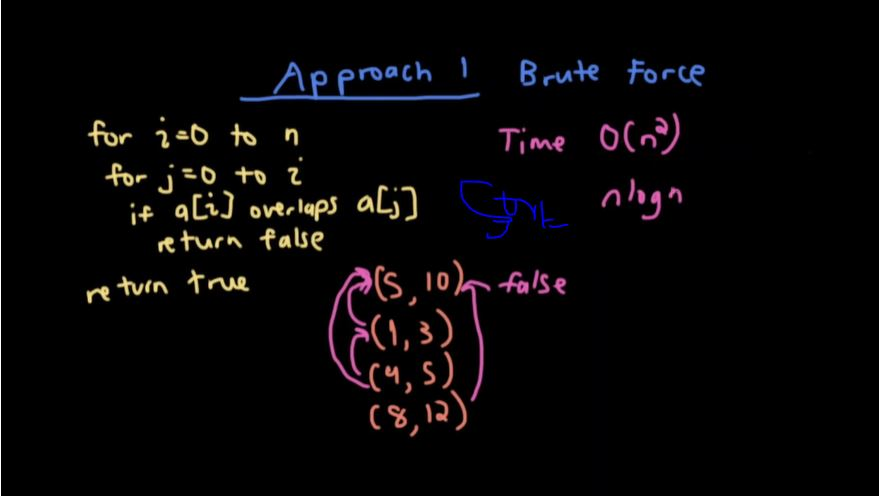 


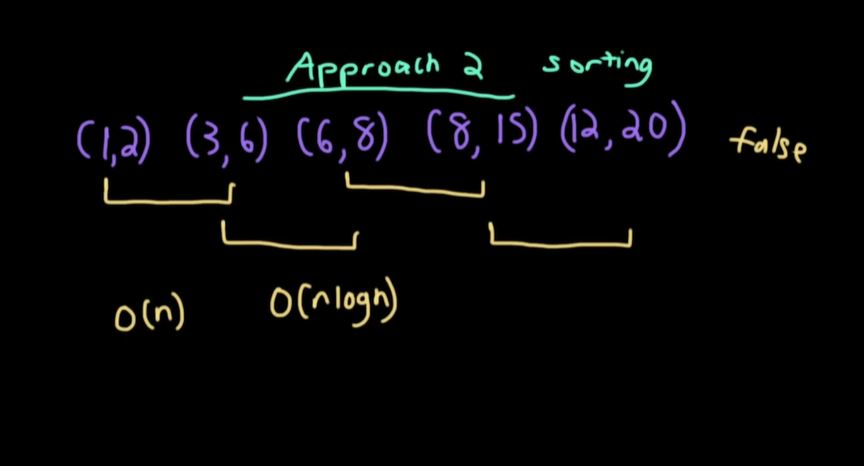

In [ ]:
class Solution:
    def canAttendMeetings(self, intervals: List[List[int]]) -> bool:
        intervals.sort()
        for i in range(len(intervals)-1):
            if intervals[i][1] >  intervals[i+1][0]:
                return False
        return True

210. Course Schedule II 

There are a total of numCourses courses you have to take, labeled from 0 to numCourses - 1. You are given an array prerequisites where prerequisites[i] = [ai, bi] indicates that you must take course bi first if you want to take course ai.

For example, the pair [0, 1], indicates that to take course 0 you have to first take course 1.
Return the ordering of courses you should take to finish all courses. If there are many valid answers, return any of them. If it is impossible to finish all courses, return an empty array.

 

Example 1:

Input: numCourses = 2, prerequisites = [[1,0]]

Output: [0,1]

Explanation: There are a total of 2 courses to take. To take course 1 you should have finished course 0. So the correct course order is [0,1].

Example 2:

Input: numCourses = 4, prerequisites = [[1,0],[2,0],[3,1],[3,2]]

Output: [0,2,1,3]

Explanation: There are a total of 4 courses to take. To take course 3 you should have finished both courses 1 and 2. Both courses 1 and 2 should be taken after you finished course 0.

So one correct course order is [0,1,2,3]. Another correct ordering is [0,2,1,3].

Example 3:

Input: numCourses = 1, prerequisites = []

Output: [0]

1. Two Sum Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

 

Example 1:

Input: nums = [2,7,11,15], target = 9

Output: [0,1]

Output: Because nums[0] + nums[1] == 9, we return [0, 1].

Example 2:

Input: nums = [3,2,4], target = 6

Output: [1,2]

Example 3:

Input: nums = [3,3], target = 6

Output: [0,1]
 

Constraints:

2 <= nums.length <= 104

-109 <= nums[i] <= 109

-109 <= target <= 109

Only one valid answer exists.

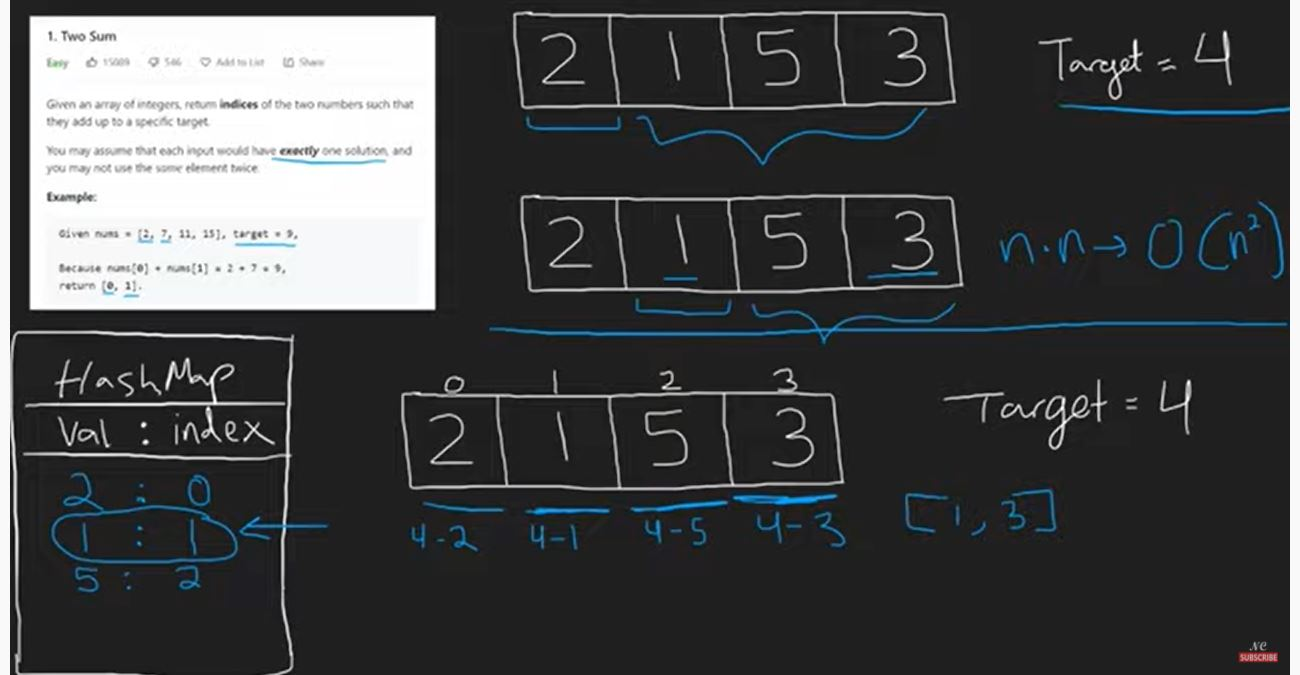

In [ ]:
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        prevMap={}
        for i,n in enumerate(nums):
            diff = target -n
            if diff in prevMap:
                return[prevMap[diff],i]
            prevMap[n]=i
        return 
        #TC O(n)
        #SC O(n)

15. 3Sum 

Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.

Notice that the solution set must not contain duplicate triplets.

 

Example 1:

Input: nums = [-1,0,1,2,-1,-4]

Output: [[-1,-1,2],[-1,0,1]]

Example 2:

Input: nums = []

Output: []

Example 3:

Input: nums = [0]

Output: []
 

Constraints:

0 <= nums.length <= 3000

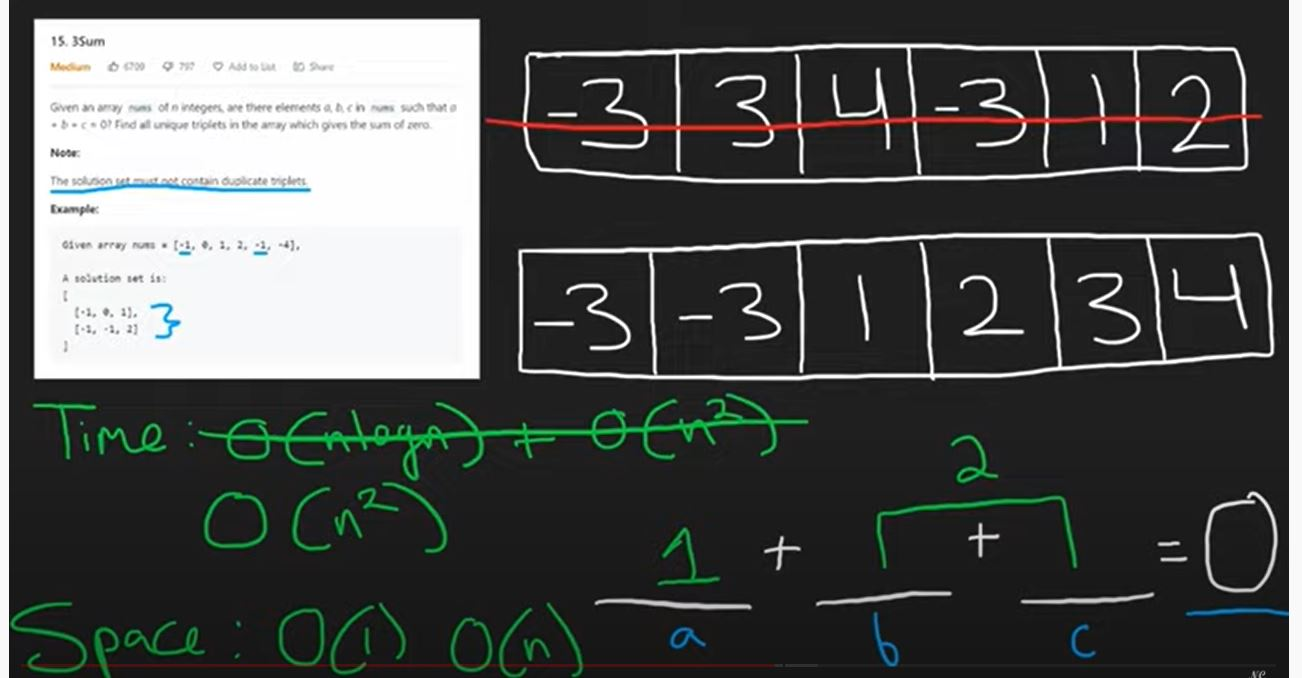

-105 <= nums[i] <= 105

In [ ]:
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        res=[]
        nums.sort()
        for i,a in enumerate(nums):
            if i>0 and a == nums[i-1]:
                continue
            l,r = i+1, len(nums)-1 
            while l < r:
                threesum= a + nums[l] + nums[r]
                if threesum >0:
                    r-=1
                elif threesum <0:
                    l+=1
                else:
                    res.append([a,nums[l],nums[r]])
                    l+=1
                    while nums[l] == nums[l-1] and l<r:
                        l+=1
        return res

98. Validate Binary Search Tree

Given the root of a binary tree, determine if it is a valid binary search tree (BST).

A valid BST is defined as follows:

The left subtree of a node contains only nodes with keys less than the node's key.
The right subtree of a node contains only nodes with keys greater than the node's key.
Both the left and right subtrees must also be binary search trees.
 

Example 1:


Input: root = [2,1,3]

Output: true

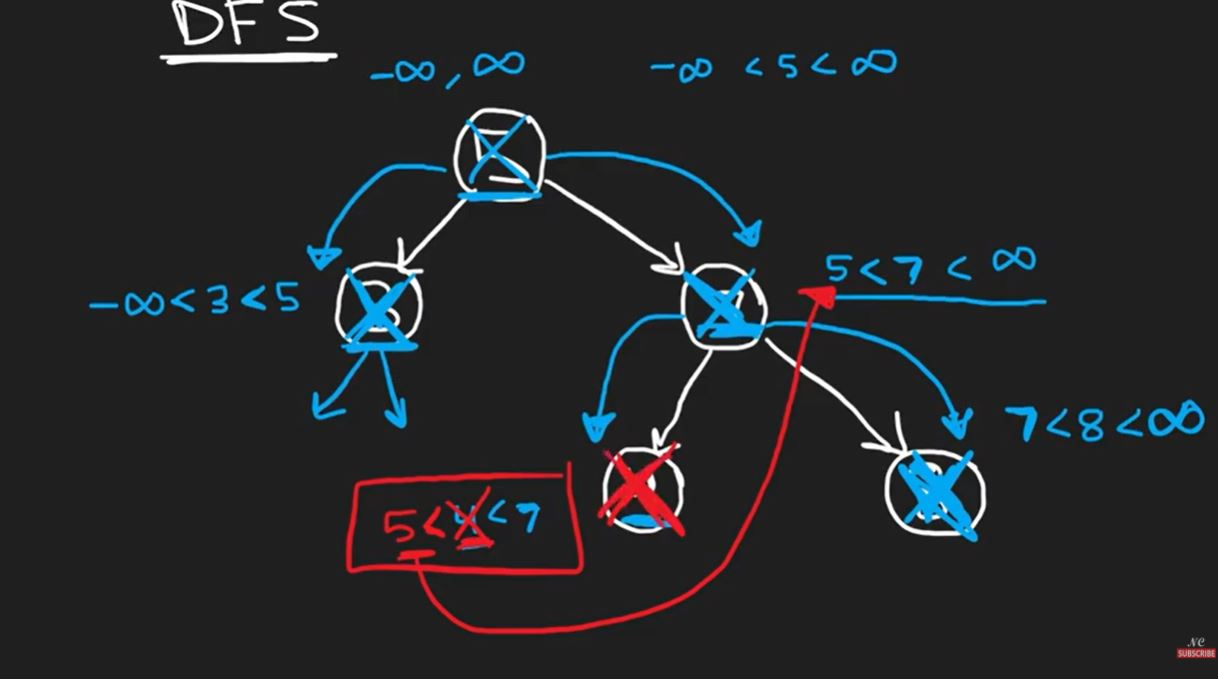



In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isValidBST(self, root: Optional[TreeNode]) -> bool:
        def valid(node,left,right):
            if not node:
                return True
            if not (node.val < right and node.val > left):
                return False
            
            return (valid(node.left,left,node.val) and valid(node.right,node.val,right))
        
        return valid(root,float("-inf"),float("inf"))

141. Linked List Cycle 

Given head, the head of a linked list, determine if the linked list has a cycle in it.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, pos is used to denote the index of the node that tail's next pointer is connected to. Note that pos is not passed as a parameter.

Return true if there is a cycle in the linked list. Otherwise, return false.

 

Example 1:


Input: head = [3,2,0,-4], pos = 1
Output: true
Explanation: There is a cycle in the linked list, where the tail connects to the 1st node (0-indexed).
Example 2:


Input: head = [1,2], pos = 0
Output: true
Explanation: There is a cycle in the linked list, where the tail connects to the 0th node.
O(1) space

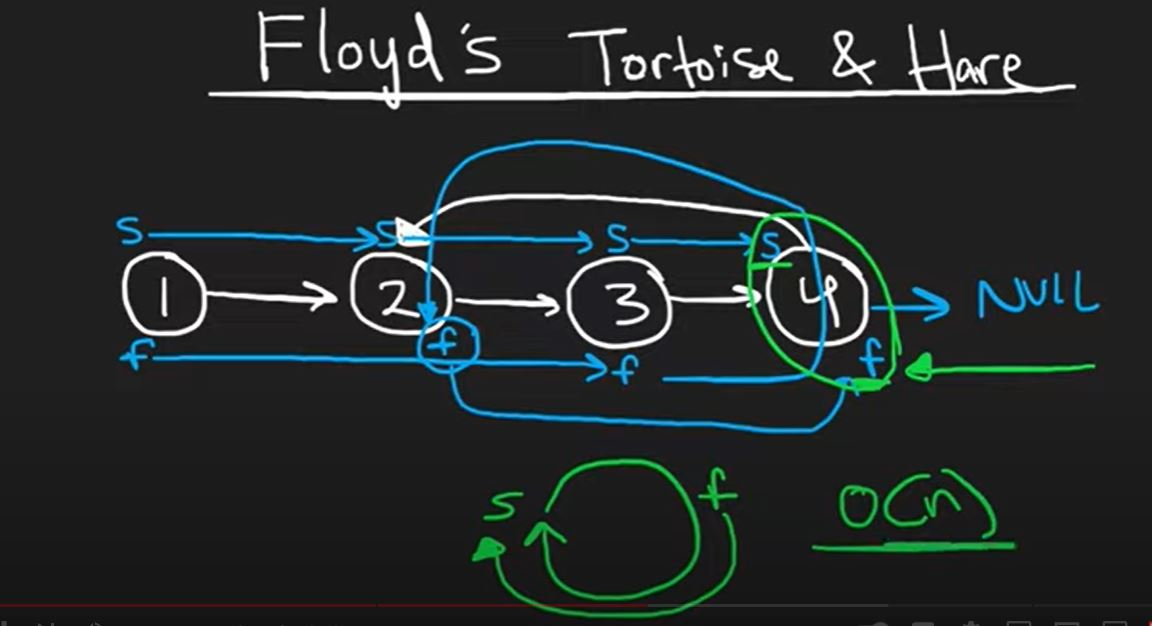

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def hasCycle(self, head: Optional[ListNode]) -> bool:
        slow,fast=head,head
        while fast and fast.next:
            slow=slow.next
            fast=fast.next.next 
            if slow == fast:
                return True
        
        return False

142. Linked List Cycle II 

Given the head of a linked list, return the node where the cycle begins. If there is no cycle, return null.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, pos is used to denote the index of the node that tail's next pointer is connected to (0-indexed). It is -1 if there is no cycle. Note that pos is not passed as a parameter.

Do not modify the linked list.

 

Example 1:


Input: head = [3,2,0,-4], pos = 1

Output: tail connects to node index 1

Explanation: There is a cycle in the linked list, where tail connects to the second node.

In [ ]:
    #with hash table TC O(n) SC O(n)
    def detectCycle(self, head: ListNode) -> ListNode:
        visited = set()

        node = head
        while node is not None:
            if node in visited:
                return node
            else:
                visited.add(node)
                node = node.next

        return None

    """
    Floyd's algorithm is separated into two distinct phases. In the first phase, it determines whether a cycle is present in the list. If no cycle is present, it returns null immediately, 
    as it is impossible to find the entrance to a nonexistant cycle. Otherwise, it uses the located "intersection node" to find the entrance to the cycle.
    TC: O(n) SC: O(1)
    """
    class Solution:
    def getIntersect(self, head):
        tortoise = head
        hare = head

        # A fast pointer will either loop around a cycle and meet the slow
        # pointer or reach the `null` at the end of a non-cyclic list.
        while hare is not None and hare.next is not None:
            tortoise = tortoise.next
            hare = hare.next.next
            if tortoise == hare:
                return tortoise

        return None
    def detectCycle(self, head: ListNode) -> ListNode:
        if head is None:
            return None

        # If there is a cycle, the fast/slow pointers will intersect at some
        # node. Otherwise, there is no cycle, so we cannot find an entrance to
        # a cycle.
        intersect = self.getIntersect(head)
        if intersect is None:
            return None

        # To find the entrance to the cycle, we have two pointers traverse at
        # the same speed -- one from the front of the list, and the other from
        # the point of intersection.
        ptr1 = head
        ptr2 = intersect
        while ptr1 != ptr2:
            ptr1 = ptr1.next
            ptr2 = ptr2.next

        return ptr1


206. Reverse Linked List 

Given the head of a singly linked list, reverse the list, and return the reversed list.

 

Example 1:


Input: head = [1,2,3,4,5]

Output: [5,4,3,2,1]

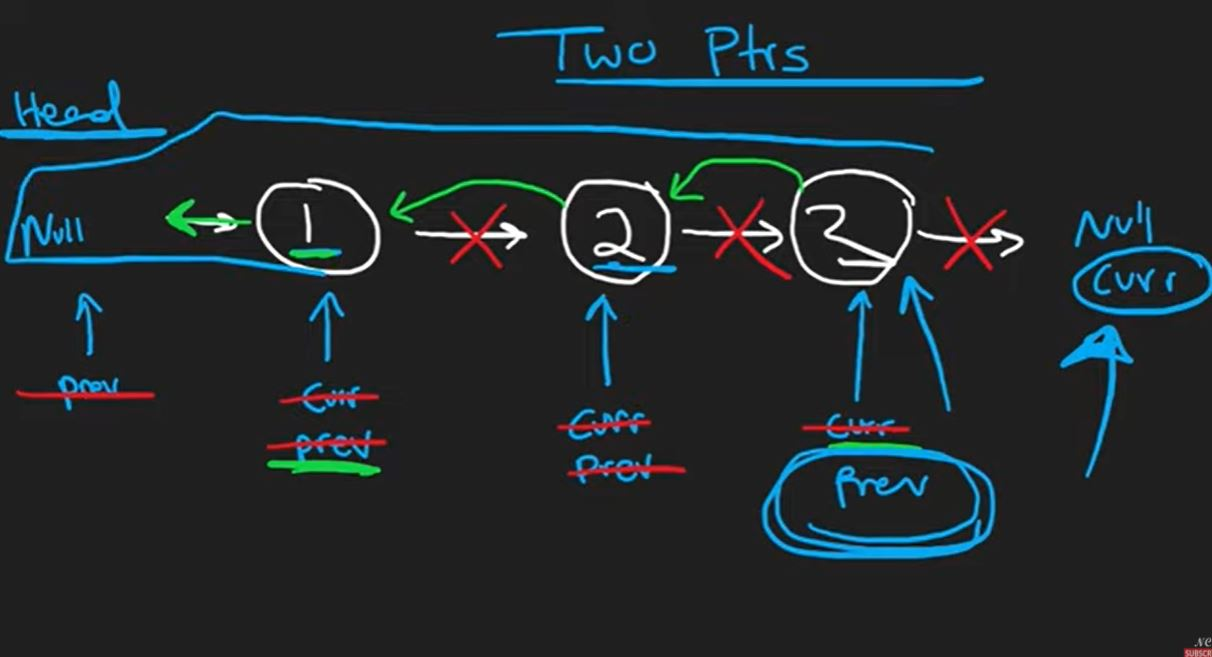

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        prev,cur = None,head
        #TC O(n) SC: O(1)
        while cur:
            nxt=cur.next
            cur.next=prev
            prev=cur
            cur=nxt
        return prev

In [ ]:
#DFS 
from collections import defaultdict
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def maxLevelSum(self, root: Optional[TreeNode]) -> int:
        def inorder(node, level):
            if node:
                inorder(node.left, level + 1)
                level_sum[level] += node.val
                inorder(node.right, level + 1)
            
        level_sum = defaultdict(int)
        inorder(root, 1)
        return max(level_sum, key = level_sum.get)

#BFS 
#O(n) both SC and TC
from collections import defaultdict
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def maxLevelSum(self, root: Optional[TreeNode]) -> int:
        cur_level,max_level=1,1
        max_sum=float('-inf')
        queue=[root,]
        
        while queue:
            # sum up all the nodes on the current level
            cur_sum=sum([x.val for x in queue ])
            #update max sum
            if cur_sum > max_sum:
                max_sum,max_level=cur_sum,cur_level
            #build next level 
            queue = [y for x in queue for y in [x.left, x.right] if y]
            cur_level +=1
        return max_level 

#BFS without list comperhnesion 
from collections import deque
class Solution:
    def maxLevelSum(self, root: TreeNode) -> int:
        curr_level = max_level = 1
        max_sum = float('-inf')
        curr_sum = 0
        
        marker = None
        queue = deque([root, marker])
        
        while len(queue) > 1:
            x = queue.popleft()
            # continue current level
            if x != marker:
                curr_sum += x.val
                if x.left:
                    queue.append(x.left)
                if x.right:
                    queue.append(x.right)
            # end of current level, go to the next level
            else:
                if curr_sum > max_sum:
                    max_sum, max_level = curr_sum, curr_level  
                curr_sum = 0
                curr_level += 1
                queue.append(marker)
            
        return max_level

20. Valid Parentheses 

Given a string s containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.

An input string is valid if:

Open brackets must be closed by the same type of brackets.
Open brackets must be closed in the correct order.
 

Example 1:

Input: s = "()"

Output: true

In [ ]:
class Solution(object):
    def isValid(self, s):
        """
        :type s: str
        :rtype: bool
        """
        stack=[]
        mapping={")":"(","}":"{","]":"["}
        for c in s:
            if c in mapping:
                top=stack.pop() if stack else "#"
                if mapping[c] != top:
                    return False
            else:
                stack.append(c)
        return not stack

21. Merge Two Sorted Lists 

Merge two sorted linked lists and return it as a sorted list. The list should be made by splicing together the nodes of the first two lists.

 
Example 2:

Input: l1 = [], l2 = []

Output: []

Example 3:

Input: l1 = [], l2 = [0]

Output: [0]

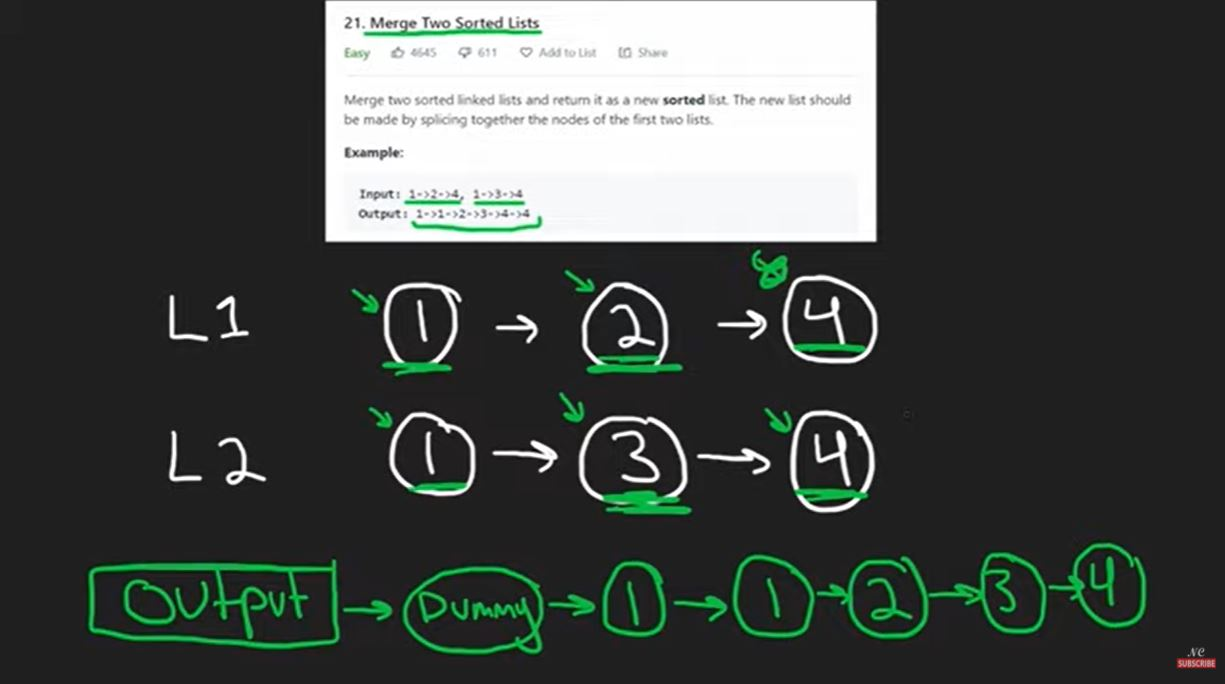

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def mergeTwoLists(self, l1: Optional[ListNode], l2: Optional[ListNode]) -> Optional[ListNode]:
        dummy= ListNode()
        tail=dummy
        
        while l1 and l2:
            if l1.val < l2.val:
                tail.next = l1
                l1=l1.next
            else:
                tail.next = l2
                l2=l2.next
            tail=tail.next
        if l1:
            tail.next = l1
        elif l2:
            tail.next =l2
        
        return dummy.next 

23. Merge k Sorted Lists 


You are given an array of k linked-lists lists, each linked-list is sorted in ascending order.

Merge all the linked-lists into one sorted linked-list and return it.

 

Example 1:

Input: lists = [[1,4,5],[1,3,4],[2,6]]

Output: [1,1,2,3,4,4,5,6]

Explanation: The linked-lists are:
[
  1->4->5,
  1->3->4,
  2->6
]

merging them into one sorted list:

1->1->2->3->4->4->5->6

Example 2:

Input: lists = []

Output: []

Example 3:

Input: lists = [[]]

Output: []

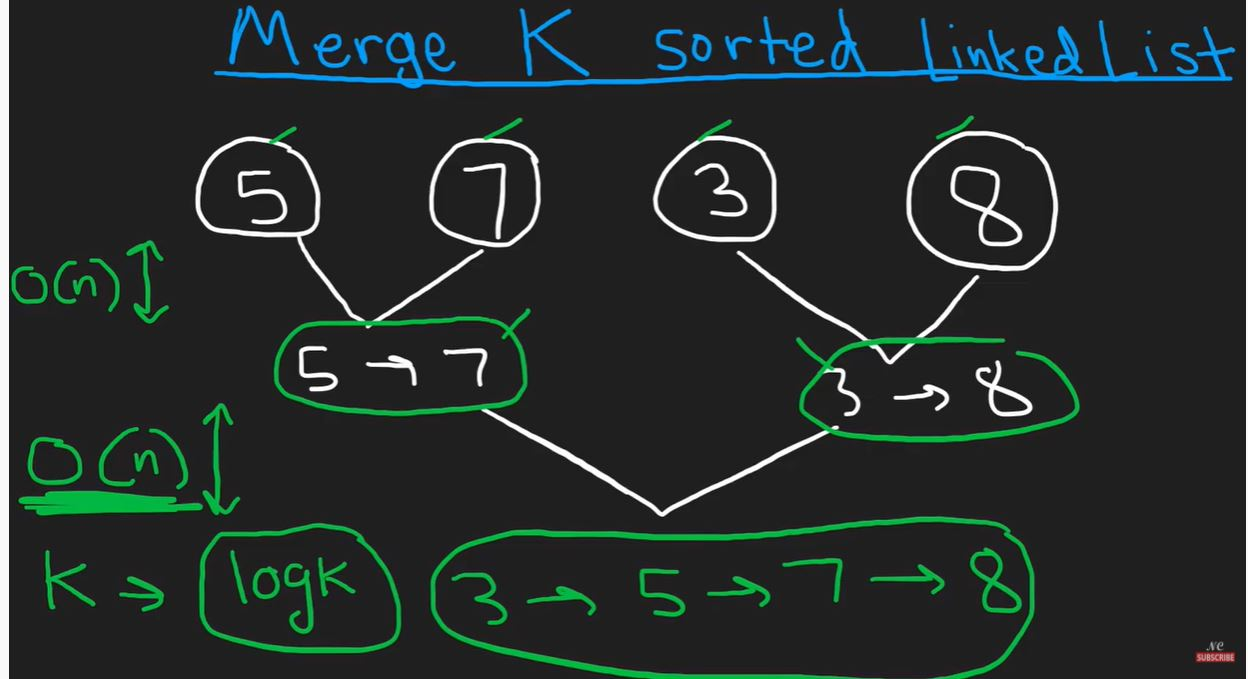

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def mergeKLists(self, lists: List[Optional[ListNode]]) -> Optional[ListNode]:
        if not lists or len(lists)==0:
            return None
        while len(lists) > 1:
            mergeLists=[]
            for i in range(0,len(lists),2):
                l1=lists[i]
                l2=lists[i+1] if (i+1) < len(lists) else None
                mergeLists.append(self.mergeList(l1,l2))
            lists=mergeLists
        return lists[0]
    
    def mergeList(self, l1 , l2):
        dummy= ListNode()
        tail=dummy
        
        while l1 and l2:
            if l1.val < l2.val:
                tail.next = l1
                l1=l1.next
            else:
                tail.next = l2
                l2=l2.next
            tail=tail.next
        if l1:
            tail.next = l1
        elif l2:
            tail.next =l2
        
        return dummy.next 

232. Implement Queue using Stacks

Implement a first in first out (FIFO) queue using only two stacks. The implemented queue should support all the functions of a normal queue (push, peek, pop, and empty).

Implement the MyQueue class:

void push(int x) Pushes element x to the back of the queue.
int pop() Removes the element from the front of the queue and returns it.
int peek() Returns the element at the front of the queue.
boolean empty() Returns true if the queue is empty, false otherwise.
Notes:

You must use only standard operations of a stack, which means only push to top, peek/pop from top, size, and is empty operations are valid.
Depending on your language, the stack may not be supported natively. You may simulate a stack using a list or deque (double-ended queue) as long as you use only a stack's standard operations.
 

Example 1:

Input
["MyQueue", "push", "push", "peek", "pop", "empty"]

[[], [1], [2], [], [], []]

Output

[null, null, null, 1, 1, false]

Explanation
MyQueue myQueue = new MyQueue();
myQueue.push(1); // queue is: [1]
myQueue.push(2); // queue is: [1, 2] (leftmost is front of the queue)
myQueue.peek(); // return 1
myQueue.pop(); // return 1, queue is [2]
myQueue.empty(); // return false

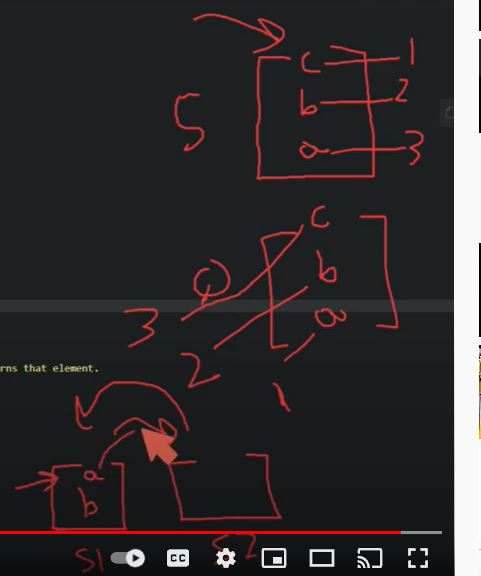

In [ ]:
class MyQueue:

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.s1 = []
        self.s2 = []        

    def push(self, x: int) -> None:
        """
        Push element x to the back of queue.
        """
        while self.s1:
            self.s2.append(self.s1.pop())
        self.s1.append(x)
        
        while self.s2:
            self.s1.append(self.s2.pop())
    def pop(self) -> int:
        """
        Removes the element from in front of queue and returns that element.
        """
        return self.s1.pop()
        

    def peek(self) -> int:
        """
        Get the front element.
        """
        return self.s1[-1]

    def empty(self) -> bool:
        """
        Returns whether the queue is empty.
        """
        return not self.s1


# Your MyQueue object will be instantiated and called as such:
# obj = MyQueue()
# obj.push(x)
# param_2 = obj.pop()
# param_3 = obj.peek()
# param_4 = obj.empty()

1143. Longest Common Subsequence

Given two strings text1 and text2, return the length of their longest common subsequence. If there is no common subsequence, return 0.

A subsequence of a string is a new string generated from the original string with some characters (can be none) deleted without changing the relative order of the remaining characters.

For example, "ace" is a subsequence of "abcde".
A common subsequence of two strings is a subsequence that is common to both strings.

 

Example 1:

Input: text1 = "abcde", text2 = "ace" 

Output: 3  

Explanation: The longest common subsequence is "ace" and its length is 3.

Example 2:

Input: text1 = "abc", text2 = "abc"

Output: 3

Explanation: The longest common subsequence is "abc" and its length is 3.

Example 3:


Input: text1 = "abc", text2 = "def"

Output: 0

Explanation: There is no such common subsequence, so the result is 0.
 

Constraints:

1 <= text1.length, text2.length <= 1000



text1 and text2 consist of only lowercase English characters.


define function LCS(text1, text2):

    # If either string is empty there can be no common subsequence
    if length of text1 or text2 is 0:

        return 0

    letter1 = the first letter in text1


    # The case where the line *is not* part of the optimal solution
    case1 = LCS(text1.substring(1), text2)


    case2 = 0

    if letter1 is in text2:

        firstOccurence = first position of letter1 in text2
        # The case where the line *is* part of the optimal solution
        
        case2 = 1 + LCS(text1.substring(1), text2.substring(firstOccurence + 1))

    return maximum of case1 and case2

In [ ]:
class Solution:
    def longestCommonSubsequence(self, text1: str, text2: str) -> int:
        # If text1 doesn't reference the shortest string, swap them.
        if len(text2) < len(text1):
            text1, text2 = text2, text1
        
        
        # The previous and current column starts with all 0's and like 
        # before is 1 more than the length of the first word.
        previous = [0] * (len(text1) + 1)
        current = [0] * (len(text1) + 1)
        
        # Iterate up each column, starting from the last one.
        for col in reversed(range(len(text2))):
            for row in reversed(range(len(text1))):
                if text2[col] == text1[row]:
                    current[row] = 1 + previous[row + 1]
                else:
                    current[row] = max(previous[row], current[row + 1])
            # The current column becomes the previous one, and vice versa.
            previous, current = current, previous
        
        # The original problem's answer is in previous[0]. Return it.
        return previous[0]